In [35]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 

In [36]:
url = 'https://raw.githubusercontent.com/Keenal/Graduate-Admission/master/Admission_Predict_Ver1.1.csv'
df = pd.read_csv(url)

In [37]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [38]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [39]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


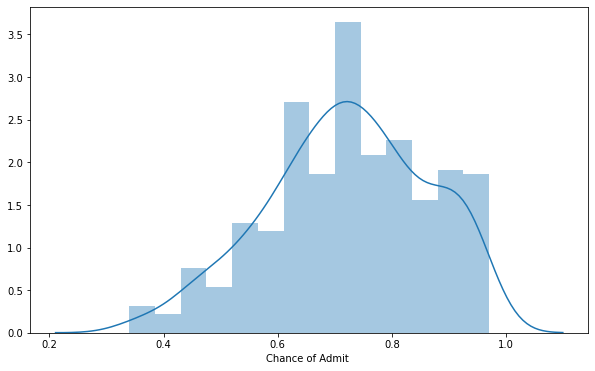

In [40]:
plt.figure(figsize=(10,6))
sns.distplot(df['Chance of Admit '])

In [41]:
df.corr()['Chance of Admit '].sort_values()

Serial No.           0.008505
Research             0.545871
LOR                  0.645365
SOP                  0.684137
University Rating    0.690132
TOEFL Score          0.792228
GRE Score            0.810351
CGPA                 0.882413
Chance of Admit      1.000000
Name: Chance of Admit , dtype: float64

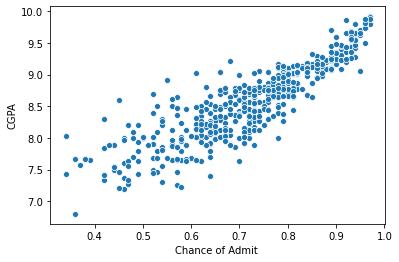

In [42]:
sns.scatterplot(x='Chance of Admit ', y='CGPA', data=df)

In [43]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [44]:
df = df.drop('Serial No.', axis=1)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [45]:
X = df.drop('Chance of Admit ', axis=1).values
y = df['Chance of Admit '].values

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [48]:
from sklearn.preprocessing import MinMaxScaler #minmaxscaler will scale the feature to be between 0 and 1.

In [49]:
scaler = MinMaxScaler()

In [50]:
X_train = scaler.fit_transform(X_train) #fit_transform will transform and fit both into one

In [51]:
X_test = scaler.transform(X_test) #we only transform and not fit because we don't want to assume prior info about our testset

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [53]:
X_train.shape

(350, 7)

In [54]:
model = Sequential()

model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [55]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=128, epochs=400)

Epoch 1/400
3/3 [==============================] - 0s 52ms/step - loss: 0.6037 - val_loss: 0.5822
Epoch 2/400
3/3 [==============================] - 0s 11ms/step - loss: 0.5640 - val_loss: 0.5496
Epoch 3/400
3/3 [==============================] - 0s 11ms/step - loss: 0.5352 - val_loss: 0.5279
Epoch 4/400
3/3 [==============================] - 0s 10ms/step - loss: 0.5168 - val_loss: 0.5132
Epoch 5/400
3/3 [==============================] - 0s 10ms/step - loss: 0.5028 - val_loss: 0.5013
Epoch 6/400
3/3 [==============================] - 0s 11ms/step - loss: 0.4914 - val_loss: 0.4906
Epoch 7/400
3/3 [==============================] - 0s 11ms/step - loss: 0.4809 - val_loss: 0.4798
Epoch 8/400
3/3 [==============================] - 0s 10ms/step - loss: 0.4704 - val_loss: 0.4690
Epoch 9/400
3/3 [==============================] - 0s 13ms/step - loss: 0.4598 - val_loss: 0.4582
Epoch 10/400
3/3 [==============================] - 0s 11ms/step - loss: 0.4490 - val_loss: 0.4471
Epoch 11/400
3/3 [=

In [58]:
losses = pd.DataFrame(model.history.history)

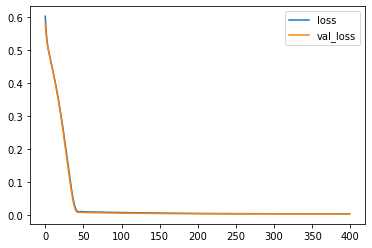

In [60]:
losses.plot()

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [62]:
predictions = model.predict(X_test)

In [65]:
np.sqrt(mean_squared_error(y_test, predictions))

0.060300862798147545

In [66]:
mean_absolute_error(y_test, predictions)

0.04454994380474091

In [67]:
df['Chance of Admit '].describe()

count    500.00000
mean       0.72174
std        0.14114
min        0.34000
25%        0.63000
50%        0.72000
75%        0.82000
max        0.97000
Name: Chance of Admit , dtype: float64

In [68]:
explained_variance_score(y_test, predictions)

0.8039217580961392

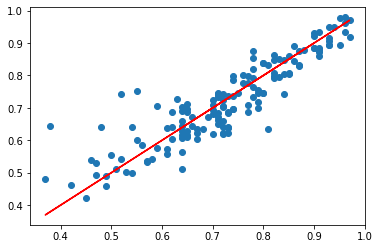

In [70]:
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')

In [71]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [72]:
single_score = df.drop('Chance of Admit ', axis=1).iloc[0] #to know if we are overshooting or undershooting

In [75]:
single_score = scaler.transform(single_score.values.reshape(-1,7))

In [76]:
model.predict(single_score)

array([[0.9456502]], dtype=float32)

In [77]:
df.head(1) # as you can know the actual is 92% and my model predicted 94% which is pretty close.

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92


In [79]:
mean_squared_error(y_test, predictions) #the rmse is pretty low too so that's a good sign

0.003636194054201015